In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print("Class Label : ", np.unique(y))

Class Label :  [0 1 2]


- Class Label 을 보통 정수로 인코딩 하는 것이 ML라이브러리 들의 관례이다.
- 성능을 향상시키고, 실수를 줄여주기 때문.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1, stratify= y)

- model_selection 모듈의 train_test_split 함수가 X, y배열을 랜덤하게 나눈다.
- test size의 매개변수 기본값은 0.2임
- 30%는 테스트 데이터 (45개), 70%는 훈련데이터 (105개) 가 된다.

In [6]:
print('y의 Label Count : ',np.bincount(y))
print('y_train의 Label Count : ',np.bincount(y_train))
print('y_test의 Label Count : ' ,np.bincount(y_test))

y의 Label Count :  [50 50 50]
y_train의 Label Count :  [35 35 35]
y_test의 Label Count :  [15 15 15]


- 계층화가 잘 되어있음을 확인

### GD 에서 보았던 것처럼 특정 스케일 조정이 필요, StandardScaler 이용

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron

In [11]:
ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [14]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수 : %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수 : 1


- ML 기술자들은 모델의 분류 오차 대신 정확도를 계산함
- 1 - 오차 = 정확도

In [15]:
# SKLEARN에 있음
from sklearn.metrics import accuracy_score
print("정확도 : %.2f" %accuracy_score(y_test, y_pred))

정확도 : 0.98


- y_test 는 진짜 클래스 레이블
- y_pred 는 앞서 예측한 클래스 레이블

In [17]:
print("정확도 : %.2f" %ppn.score(X_test_std, y_test))

정확도 : 0.98


In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [20]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 마커와 컬러맵 설정
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계를 그린다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label = cl,
                   edgecolor = 'black')
        
        #테스트 샘플 부각하기
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:,0], X_test[:, 1],
                       facecolors='none', edgecolor='black', alpha = 1.0,
                       linewidth=1, marker = 'o',
                       s=100, label = 'test set')

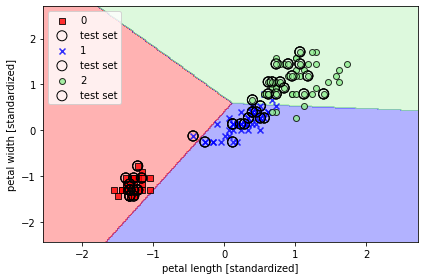

In [22]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,
                     classifier =ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- Perceptron 은 클래스가 선형적으로 구분되지 않을 때 수렴할 수 없다. Epoch 마다 적어도 하나의 샘플이 잘못 분류되기 때문에 가중치의 업데이트가 계속된다.
- 학습률을 바꾸거나, Epoch 횟수를 늘릴 수는 있지만, 퍼셉트론은 이 데이터셋에 절대 수렴하지 못한다.